# Multi-Layer Perceptron for Image Classification

Welome to the **first** programming assignment of the Deep Learning course. 

In this assignment, a complete set of Jupyter Notebook and python scripts are prepared for examining almost all critical factors in designing a Multi-layer Perceptron model.

You will complete the python scripts which have been provided in the project directory to build a deep network, and apply it to a multi-label classification problem. Additionally you will play around varoius factors which may enhance the performance of a deep neural network model.

**After this assignment you will be able to:**

 - Build and apply a deep neural network to supervised learning using PyTorch framework.
 - See how factors like **Regularization techniques**, **Activation functions**, **Number of layers and units**, **Weights initialization** and **Data augmentation** affect the result of learning process.
 
**Before you start:** Please read the Submission section at the bottom of the notebook carefully. 
 
Let's get started!

# 0. Packages and modules

Let's first import all the packages that you will need during this assignment.

In [1]:
from dataset import SignDigitDataset
from utils import *
from model import MLP
import torch
import numpy

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"You are using {device}!")

You are using cpu!


# 1. Dataset

Sign languages (also known as signed languages) are languages that use manual communication to convey meaning. This can include simultaneously employing hand gestures, movement, orientation of the fingers, arms or body, and facial expressions to convey a speaker's ideas. [Source.](https://en.wikipedia.org/wiki/Sign_language)

The dataset that you'll be using during this assignment is a subset of the sign language digits. It contains six different classes representing the digits from 0 to 5. You can see some of the images below.

<p align="center">
  <img src="images/samples.png">
</p>

**Problem Statement:** You are given two dataset `train_signs.h5` and `test_signs.h5` containing:

    -- a training/test set of images labelled as one of the classes in {0, 1, 2, 3, 4, 5}.
    -- each image is of shape (64, 64, 3) where 3 is for the 3 channels (RGB).
    -- train a MLP model to classify the test images.
    
Let's get more familiar with the dataset.

---
## `dataset.py`:

One of the first steps for designing a deep learning model is to get to know the data as best as possible. The better we know the data (shape, data distribution, etc.), the more proper model can be designed.

For this we must create the dataset which we want to feed the model. As we are using PyTorch for this assignment, you must know how to create **torch data loaders**.

In this question you have to complete some parts of `__getitem__()` in `dataset.py` and the following functions in `utils.py`:

- `get_transformations()`: for data transformation and also needed augmentations.
- `get_one_hot()`: for converting the labels into a model usable labels.
- `visualize_samples()`: to plot some of the images to see some samples.


**Note:** Before that, please visit the official documentaion of pytorch for creating custom datasets to learn how we create them for pytorch deep learning models.
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

### `get_transformations()`:

As we mentioned earlier, the shape of the tensor we have now of images is **(n_samples, 64, 64, 3)**. But if we want to feed it to a MLP model, we must consider some transformations:

    -- Flattening them to have the shape of (n_samples, 64*64*3).
    -- Normalizing each pixel has to have a value between 0 - 1.(Hopefully this will be handled automatically)
    -- Convert the numpy arrays to tensors. (using transforms.ToTensor())
    
<p align="center">
  <img src="images/imvectorkiank.png">
</p>    
    
These were the minimum transformation which must be applied on the input raw images. Later in this assignment we will add some random transformations (a.k.a augmentations) which could affect the performance of the model.

### `get_one_hot()`:

Many time in deep learning you will have a $Y$ ranging from 0 to $C-1$, where $C$ is the number of the classes. If $C$ is for example 4, then you might have the following $y$ vector which you will need to convet like this:
    
<p align="center">
  <img src="images/onehot.png">
</p>    
    
This is called **one hot** encoding, because in the converted representation, exactly one element of each column is "hot" (meaning set to 1).

### `visualize_samples()`:

At the end of this part, we want to plot some random samples of the dataset. To do this, you have to complete `visualize_samples()` in `utils.py` using [Matplotlib](https://matplotlib.org) funcionalities.

After completing that function, run the cell below to observe the result.

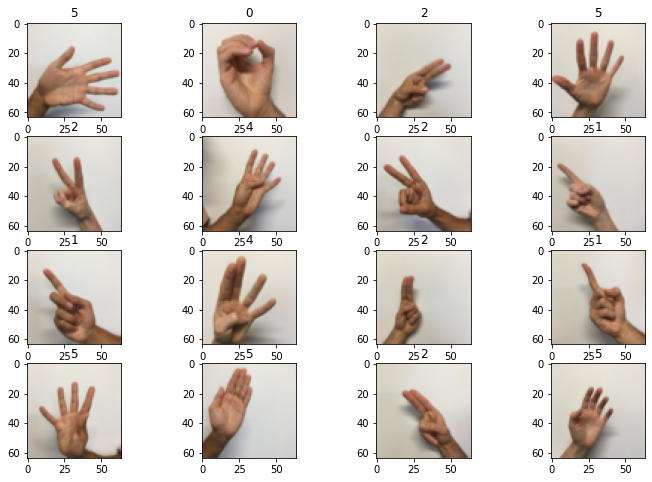

In [3]:
train_dataset = SignDigitDataset(root_dir='data/',
                                 h5_name='train_signs.h5',
                                 train=True,
                                 transform=get_transformations(64))

test_dataset = SignDigitDataset(root_dir='data/',
                                h5_name='test_signs.h5',
                                train=False,
                                transform=get_transformations(64))


visualize_samples(train_dataset, n_samples=16, cols=4) 

# 2. Architecture of your model

Now that you are familiar with the dataset, it is time to build a deep neural network to classify sign digit images. All the modification which you have consider in this part, must be applied in `model.py`. It consits the a Pytorch class named as **MLP**. All the torch model classes must inherit `torch.nn.Module`.

For a review on how torch models have to be created, please visit the pytorch official documentaion: https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html

More precisely, in this part, you will complete `MLP.__init__()` and `MLP.forward()` functions:

- `MLP.__init__()`: In this function, all the parameters will be initialized. such as number of layers and units per layer. Note that the model you are implementing must be capable to have every custom number of layers, neurons and also activation layers.

- `MLP.forward()`: For forward propagation purpose. *(~ 1 line of code)*

In [4]:
# to test the implemented functions (for Debugging purposes)
batch, C, H, W = 10, 3, 64, 64
zero_tensor = torch.zeros([batch, C, H, W], dtype=torch.float32)
zero_tensor = torch.reshape(zero_tensor, (batch, -1))
input_size = C*H*W
num_classes = 6
units = [input_size, 7, 7, num_classes]

mlp = MLP(units=units, hidden_layer_activation='relu')
print(mlp)
out = mlp(zero_tensor)
assert out.shape == torch.Size([batch, num_classes]), f'Model output size expected to be {torch.Size([batch, num_classes])}'

MLP(
  (activation): ReLU()
  (mlp): Sequential(
    (linear1): Linear(in_features=12288, out_features=7, bias=True)
    (activation1): ReLU()
    (linear2): Linear(in_features=7, out_features=7, bias=True)
    (activation2): ReLU()
    (linear3): Linear(in_features=7, out_features=6, bias=True)
  )
)


# 3. Tarining the model

Its time to train your beautiful model :) All you need is a `train.py` file and you have to follow the steps below in order complete it:

1. Create train and test data loaders with respect to some hyper-parameters including batch_size.
2. Get an instance of your MLP model.
3. Define an appropriate loss function (e.g. cross entropy loss)
4. Define an optimizers with proper hyperparameters such as (learning_rate, ...).
5. Implement the main loop function with n_epochs iterations which the learning and evaluation process occurred there. In this loop, you have to log the training and test set loss and accuracy to see if your model works correctly or not.

6. Save the model weights for laters usages.


## 3.1 Train your first MLP model (30 points)

After defining the model we need to trigger training process by using the code partly prepared in `train.py` after filling required lines run the following cell to start training. In this file some writers are defined which are later used for plotting visualizations in tensorboard framework. Summary information defined as scalars (like loss) are saved by this writers in logs folder near existing files.

In [ ]:
# an example of how we run the train.py script
!python train.py --n_epochs 100 --hidden_layers 25 12 --print_every 10 --learning_rate 0.001

**Important note:** In this step, your code must work without any bugs and errors and you are free to play around your code to run different traininig procedures to have a saved proper model.

Also by running the cell below, you can your training curves (e.g. loss and accuracy).


In [45]:
# see the learning curve
%load_ext tensorboard 
%tensorboard --logdir=./runs 

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

# 4. Experimenting on features of an MLP

In the rest of this notebook, some experiments should be done on different setting like regularization, activation function, number of layers, etc combined with some visualizations.

## 4.1 Different initializations (20 points)

First we want to see the effect of two common initializers:

 1. Zero constant
 2. Uniform distribution
 
At first we use zero initializer **both for biases and weights**. By doing so, specially for weight initialization, the network will get in trouble with **breaking the symmetry.**

In [1]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 1 STARTS HERE ##############

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 1 ENDS HERE ##############

### Question 1: 

Use tensorboard visualizations of learning curves (like loss and accuracy to discuss about the issue raised by using zeros initializer for weights. Does uniform random initializing a good choice as weight initialization method?

--------

## 4.2 Different activation functions (15 points)

Now, lets try different activation functions and evaluate the existence of activation functions amond hidden layers as a powerful to learn non-linear functions. Hence you have to train you model:

1. Without any activation layer (except softmax function for last layer).
2. With `nn.Sigmoid()` as hidden layer activation functions.
3. With `nn.ReLu()` as hidden layer activation functions.



In [ ]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 2 STARTS HERE ##############

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 2 ENDS HERE ##############

### Question 2: 

Use tensorboard visualizations of learning curves (like loss and accuracy to discuss about the impact of learning procedures with/without different activation functions for hidden layers. Which one do you chosse as a best case?

--------

## 4.3 Differnet architectures (20 points)

Next, we will cast light on the importance of architecture of neural networks (more specifically number of layers and units).

In the first one we have 3 hidden layers with 500, 100, 50 units, respectively. This model imposes high computational cost. On the other hand, the second network has one less hidden layer but same number of units in the rest of layers. Totally it has less complexity in terms of number of parameters compared with the first network.

In [ ]:
num_hidden_list = [[500, 100, 50], [100, 50]]

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 3 STARTS HERE ##############

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 3 ENDS HERE ##############

### Question 3:

By using tensorboard visualiztions justify the different outcomes of training the above two neural network architectures.

--------

## 4.4 Overfitting prevention (15 points)

Another important point to consider is applying regularization or data augmentation methods and being aware of its impact on training and generalization. Its most important rule is to prevent our learning process from overfitting (you may have encountered this phenomenon above!)

In this part you have to modify your codes to support **at least one of the following methods**:

1. Add some other useful transformation(augmentation) techniques using `torchvision.transforms`. All the codes for this part must be added in `dataset.py` and `utils.py`. (https://pytorch.org/vision/stable/transforms.html)

2. Add dropout to your hidden layers. Try dropout rates such as 0.2 and 0.5. (https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

In [ ]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 4 STARTS HERE ##############

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 4 ENDS HERE ##############

### Question 4:

By using tensorboard visualiztions justify the different outcomes of training the above two neural network architectures.
To show this, your learning cuvres must include both training and test curves.

--------

## 4.5 Hyper-parameters tuning (Optional - 10 points)

Great! We saw how different factors would affect the performance of a MLP model. Now its time to find the best model by tuning various hyper-parameters we have. In this part you are welcomed to train the best model. More specifically, you have to:

1. Try different hyper-parameters (n_hidden_layers, batch_size, learning_rate, optimizer, momentum rate and etc. )

2. save the best model as `best_model.pth` and
3. Write all the assumed hyper-parameters in `params.yaml` file.
4. Use tenorboard to plot the learning curve and report the final loss and accuracy that you get for both training and test sets.

In [2]:
############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 5 STARTS HERE ##############

############## YOUR CODES FOR RUNNING EXPERIMENTS OF QUESTION 5 ENDS HERE ##############

# 5. Submission

Please read the notes here carefully:

1. In addition to completing the code files, please send a report including your answer to these questions as well. Do not forget to put the diagrams and visualizations needed in each part.

2. The file you upload must be named as `[Student ID]-[Your name].zip`.

3. Your notebook must be executed without any problem. If not, you will lose points for each part consequently. 

4. **Important Note:** The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that part.


In case you have any questions, contact **mohammad99hashemi@gmail.com** or **naghmefarzi@gmail.com**.

Good luck :)